In [1]:
#!pip install squarify

In [2]:
#!pip install wordcloud

In [8]:
# Dependencies
import os 
import pandas as pd 
import numpy as np
from sqlalchemy import create_engine

import missingno as msno 
import warnings
warnings.filterwarnings("ignore")
import pymongo
import datetime
from webdriver_manager.chrome import ChromeDriverManager
import ssl
import certifi
from urllib import request as req
import requests
from sqlalchemy import create_engine
import json
from pymongo import MongoClient 
import matplotlib.pyplot as plt
import squarify 
%matplotlib inline
from wordcloud import WordCloud

# Reading in clean combined files
true_df = pd.read_csv("datasource/clean_data_source/clean_true_full.csv", encoding='utf-8')
fake_df = pd.read_csv("datasource/clean_data_source/clean_fake_full.csv", encoding='utf-8')
combined_df=pd.concat([true_df, fake_df])
combined_clean_df=pd.concat([true_df, fake_df])

In [9]:
combined_df.tail(100)


,title,text,subject,date,status
23381,Hillary Clinton: “Victory Fund” Gets Massive C...,Wall Street on ParadeAt the Democratic debate ...,Middle-east,"April 8, 2016",1
23382,Windows 10 is Stealing Your Bandwidth (You Mig...,21st Century Wire says We ve heard a lot of no...,Middle-east,"April 7, 2016",1
23383,BOILER ROOM – EP #51 – Social Rejects & Politi...,Tune in to the Alternate Current Radio Network...,Middle-east,"April 6, 2016",1
23384,REVEALED: The CIA Ran LSD Sex Houses in San Fr...,Gary Kamiya SF ChronicleOn an elegant dead-end...,Middle-east,"April 6, 2016",1
23385,Utah Ranchers Vow to Stand Up to Government Ab...,"Sam Levin The GuardianOn 23 January, a group o...",Middle-east,"April 5, 2016",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1


In [10]:
agg_func_describe={'subject':['describe']}
treemap_df=combined_clean_df.groupby(['subject']).agg(agg_func_describe).round(2)

In [11]:
df = combined_df.groupby(['subject']).count().reset_index()
df

,subject,title,text,date,status
0,Government News,1570,1570,1570,1570
1,Middle-east,778,778,778,778
2,News,9050,9050,9050,9050
3,US_News,783,783,783,783
4,left-news,4459,4459,4459,4459
5,politics,6841,6841,6841,6841
6,politicsNews,11272,11272,11272,11272
7,worldnews,10145,10145,10145,10145


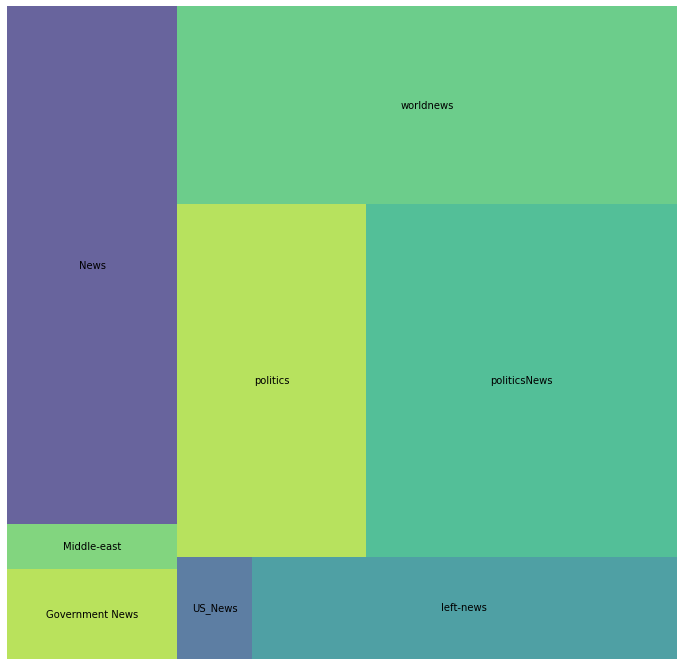

In [63]:
fig, ax = plt.subplots(1, figsize = (12,12))
squarify.plot(sizes=df['text'], 
              label=df['subject'], 
              alpha=.8 )
plt.axis('off')
plt.savefig("images/treemap1.png")
plt.show()

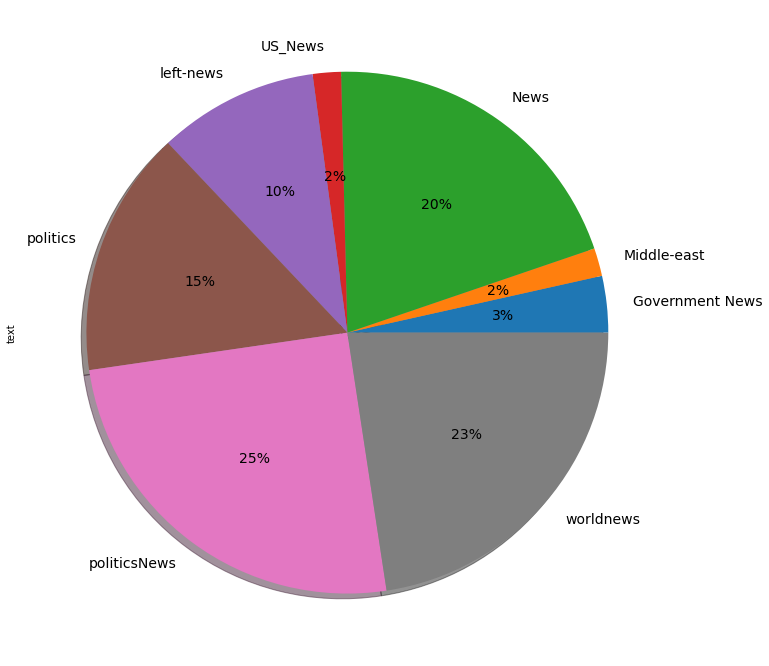

In [35]:
df.plot(kind='pie',y='text',autopct= '%1.00f%%', figsize = (12,12), shadow=True, 
                    labels=df["subject"], legend=False, fontsize=14)
plt.savefig("images/subjectpiechart.png")

In [27]:
total_df = combined_df.groupby(['status']).count().reset_index()
total_df


<Figure size 432x288 with 0 Axes>

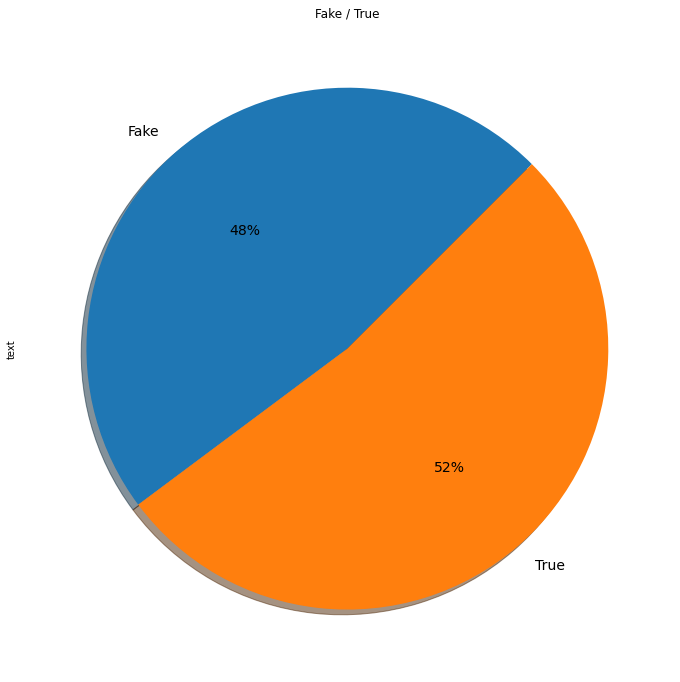

In [48]:
labels2=["Fake","True"]
total_df.plot(kind='pie',y='text',autopct= '%1.00f%%', figsize = (12,12), title= "Fake / True", shadow=True, 
                    #labels=total_df["subject"], 
              labels=labels2, legend=False, fontsize=14, startangle=45)

plt.savefig("images/fakevstrue.png")

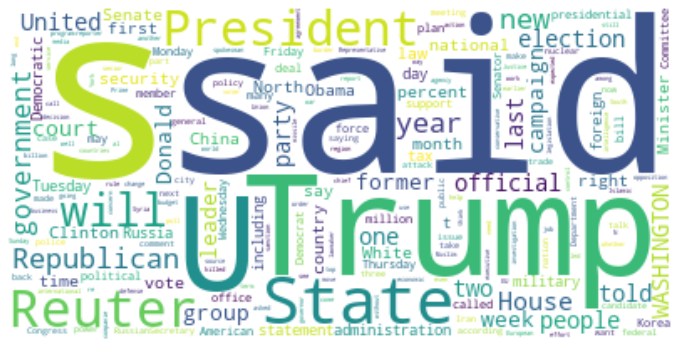

In [60]:
#Checking the Data
true_df.head()
#Checking for NaN values
true_df.isna().sum()
#Removing NaN Values
true_df.dropna(inplace = True)
#Creating the text variable
text = " ".join(text for text in true_df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text2)
# Display the generated Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.savefig("images/truewordworldcloud.png")


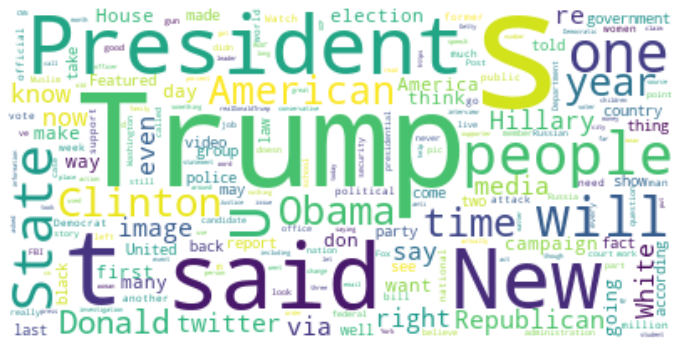

In [61]:
#Checking the Data
fake_df.head()
#Checking for NaN values
fake_df.isna().sum()
#Removing NaN Values
fake_df.dropna(inplace = True)
#Creating the text variable
text = " ".join(text for text in fake_df.text)

# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
#word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text2)
# Display the generated Word Cloud
plt.figure(figsize=(12,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")

plt.savefig("images/fakewordworldcloud.png")